# Big Data Analytics - Assignment 01 **[Udara Dananjaya] [BSIT 211002]**


# Setting up the environment for PySpark,

Update and upgrade the repositories

In [1]:
!apt update &> /dev/null
!apt upgrade -y &> /dev/null

Check if pip is installed.

In [2]:
!pip --version


pip 23.1.2 from /usr/local/lib/python3.10/dist-packages/pip (python 3.10)


# Installing Spark
Install Dependencies:

1.   Java 8
2.   Apache Spark with hadoop and
3.   Findspark (used to locate the spark in the system)


In [3]:
!pip install pyspark --quiet
!pip install -U -q PyDrive --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.9/316.9 MB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


install the OpenJDK 8 JDK (Java Development Kit) in a headless mode

In [4]:
!apt install openjdk-8-jdk-headless &> /dev/null

Setting the `JAVA_HOME` environment variable on the system

In [5]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

In [6]:
!echo $JAVA_HOME


/usr/lib/jvm/java-8-openjdk-amd64


The code initializes a Spark session using PySpark. It sets the application name to "bigData" and configures the Spark UI port to be 4050.

In [7]:
from pyspark.sql import SparkSession

spark = SparkSession \
    .builder \
    .appName("bigData") \
    .config("spark.ui.port", "4050") \
    .getOrCreate()

To retrieve details about your Spark application, you can access the `spark` variable, which represents the SparkSession.

In [8]:
spark

To get a dataset, we can use the `wget` command. `wget [options] [URL]`

In [10]:
!wget https://raw.githubusercontent.com/Udara-Dananjaya/PySpark_Sample/main/Dataset.csv

--2023-11-12 16:56:48--  https://raw.githubusercontent.com/Udara-Dananjaya/PySpark_Sample/main/Dataset.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 41957453 (40M) [text/plain]
Saving to: ‘Dataset.csv’

Dataset.csv         100%[===================>]  40.01M   244MB/s    in 0.2s    

2023-11-12 16:56:49 (244 MB/s) - ‘Dataset.csv’ saved [41957453/41957453]



After downloading the file, we can check if it was downloaded successfully using the `ls` command.

In [11]:
!ls

Dataset.csv  sample_data


Read the board_games.csv file using the Spark spark.read.csv() function.

In [12]:
df = spark.read.csv('Dataset.csv', header = True, sep = ",")

display the columns of the dataframe

In [13]:
df.show(5)

+-----+--------+------+-------------+-----------+-------+-----------------+------+-----------------+------+----------+------+-----+----+--------+---------+-----------+----------+------+
|index|  stream|Zscore|district_rank|island_rank|al_year|             sub1|sub1_r|             sub2|sub2_r|      sub3|sub3_r|cgt_r|ge_r|syllabus|birth_day|birth_month|birth_year|gender|
+-----+--------+------+-------------+-----------+-------+-----------------+------+-----------------+------+----------+------+-----+----+--------+---------+-----------+----------+------+
|    0|    ARTS|-.3550|   4336 (NEW)|64994 (NEW)|   2020|POLITICAL SCIENCE|     S|DANCING(BHARATHA)|     C|     TAMIL|     S|  056|   S|     new|       31|        May|      2001|female|
|    1|    ARTS|-.2648|   4154 (NEW)|62338 (NEW)|   2020|POLITICAL SCIENCE|     S|   CARNATIC MUSIC|     C|     TAMIL|     C|  032|   C|     new|       13|    January|      2002|female|
|    2|COMMERCE|-.4760|   6910 (NEW)|37307 (NEW)|   2020|        ECONO

In [14]:
df.show(5, truncate=True)

+-----+--------+------+-------------+-----------+-------+-----------------+------+-----------------+------+----------+------+-----+----+--------+---------+-----------+----------+------+
|index|  stream|Zscore|district_rank|island_rank|al_year|             sub1|sub1_r|             sub2|sub2_r|      sub3|sub3_r|cgt_r|ge_r|syllabus|birth_day|birth_month|birth_year|gender|
+-----+--------+------+-------------+-----------+-------+-----------------+------+-----------------+------+----------+------+-----+----+--------+---------+-----------+----------+------+
|    0|    ARTS|-.3550|   4336 (NEW)|64994 (NEW)|   2020|POLITICAL SCIENCE|     S|DANCING(BHARATHA)|     C|     TAMIL|     S|  056|   S|     new|       31|        May|      2001|female|
|    1|    ARTS|-.2648|   4154 (NEW)|62338 (NEW)|   2020|POLITICAL SCIENCE|     S|   CARNATIC MUSIC|     C|     TAMIL|     C|  032|   C|     new|       13|    January|      2002|female|
|    2|COMMERCE|-.4760|   6910 (NEW)|37307 (NEW)|   2020|        ECONO

In [15]:
df.limit(5)

DataFrame[index: string, stream: string, Zscore: string, district_rank: string, island_rank: string, al_year: string, sub1: string, sub1_r: string, sub2: string, sub2_r: string, sub3: string, sub3_r: string, cgt_r: string, ge_r: string, syllabus: string, birth_day: string, birth_month: string, birth_year: string, gender: string]

In [16]:
df.columns

['index',
 'stream',
 'Zscore',
 'district_rank',
 'island_rank',
 'al_year',
 'sub1',
 'sub1_r',
 'sub2',
 'sub2_r',
 'sub3',
 'sub3_r',
 'cgt_r',
 'ge_r',
 'syllabus',
 'birth_day',
 'birth_month',
 'birth_year',
 'gender']

In [17]:
df.dtypes

[('index', 'string'),
 ('stream', 'string'),
 ('Zscore', 'string'),
 ('district_rank', 'string'),
 ('island_rank', 'string'),
 ('al_year', 'string'),
 ('sub1', 'string'),
 ('sub1_r', 'string'),
 ('sub2', 'string'),
 ('sub2_r', 'string'),
 ('sub3', 'string'),
 ('sub3_r', 'string'),
 ('cgt_r', 'string'),
 ('ge_r', 'string'),
 ('syllabus', 'string'),
 ('birth_day', 'string'),
 ('birth_month', 'string'),
 ('birth_year', 'string'),
 ('gender', 'string')]

In [18]:
df.printSchema()

root
 |-- index: string (nullable = true)
 |-- stream: string (nullable = true)
 |-- Zscore: string (nullable = true)
 |-- district_rank: string (nullable = true)
 |-- island_rank: string (nullable = true)
 |-- al_year: string (nullable = true)
 |-- sub1: string (nullable = true)
 |-- sub1_r: string (nullable = true)
 |-- sub2: string (nullable = true)
 |-- sub2_r: string (nullable = true)
 |-- sub3: string (nullable = true)
 |-- sub3_r: string (nullable = true)
 |-- cgt_r: string (nullable = true)
 |-- ge_r: string (nullable = true)
 |-- syllabus: string (nullable = true)
 |-- birth_day: string (nullable = true)
 |-- birth_month: string (nullable = true)
 |-- birth_year: string (nullable = true)
 |-- gender: string (nullable = true)



In [32]:
df = spark.read.csv('Dataset.csv', header=True, sep=",", inferSchema=True)
df.printSchema()

root
 |-- index: integer (nullable = true)
 |-- stream: string (nullable = true)
 |-- Zscore: string (nullable = true)
 |-- district_rank: string (nullable = true)
 |-- island_rank: string (nullable = true)
 |-- al_year: integer (nullable = true)
 |-- sub1: string (nullable = true)
 |-- sub1_r: string (nullable = true)
 |-- sub2: string (nullable = true)
 |-- sub2_r: string (nullable = true)
 |-- sub3: string (nullable = true)
 |-- sub3_r: string (nullable = true)
 |-- cgt_r: string (nullable = true)
 |-- ge_r: string (nullable = true)
 |-- syllabus: string (nullable = true)
 |-- birth_day: string (nullable = true)
 |-- birth_month: string (nullable = true)
 |-- birth_year: string (nullable = true)
 |-- gender: string (nullable = true)



In [33]:
from pyspark.sql.types import *
df.columns

['index',
 'stream',
 'Zscore',
 'district_rank',
 'island_rank',
 'al_year',
 'sub1',
 'sub1_r',
 'sub2',
 'sub2_r',
 'sub3',
 'sub3_r',
 'cgt_r',
 'ge_r',
 'syllabus',
 'birth_day',
 'birth_month',
 'birth_year',
 'gender']

In [34]:
# Creating a list of the schema in the format column_name, data_type
labels = [
    ('index',IntegerType()),
    ('stream',StringType()),
    ('Zscore',StringType()),
    ('district_rank',StringType()),
    ('island_rank',StringType()),
    ('al_year',StringType()),
    ('sub1',StringType()),
    ('sub1_r',StringType()),
    ('sub2',StringType()),
    ('sub2_r',StringType()),
    ('sub3',StringType()),
    ('sub3_r',StringType()),
    ('cgt_r',StringType()),
    ('ge_r',StringType()),
    ('syllabus',StringType()),
    ('birth_day',IntegerType()),
    ('birth_month',StringType()),
    ('birth_year',IntegerType()),
    ('gender',StringType())
]

In [35]:
# Creating the schema that will be passed when reading the csv
schema = StructType([StructField (x[0], x[1], True) for x in labels])
schema

StructType([StructField('index', IntegerType(), True), StructField('stream', StringType(), True), StructField('Zscore', StringType(), True), StructField('district_rank', StringType(), True), StructField('island_rank', StringType(), True), StructField('al_year', StringType(), True), StructField('sub1', StringType(), True), StructField('sub1_r', StringType(), True), StructField('sub2', StringType(), True), StructField('sub2_r', StringType(), True), StructField('sub3', StringType(), True), StructField('sub3_r', StringType(), True), StructField('cgt_r', StringType(), True), StructField('ge_r', StringType(), True), StructField('syllabus', StringType(), True), StructField('birth_day', IntegerType(), True), StructField('birth_month', StringType(), True), StructField('birth_year', IntegerType(), True), StructField('gender', StringType(), True)])

In [36]:
df.show(truncate=False)

+-----+--------+------+-------------+-----------+-------+-----------------+------+------------------+------+----------+------+------+------+--------+---------+-----------+----------+------+
|index|stream  |Zscore|district_rank|island_rank|al_year|sub1             |sub1_r|sub2              |sub2_r|sub3      |sub3_r|cgt_r |ge_r  |syllabus|birth_day|birth_month|birth_year|gender|
+-----+--------+------+-------------+-----------+-------+-----------------+------+------------------+------+----------+------+------+------+--------+---------+-----------+----------+------+
|0    |ARTS    |-.3550|4336 (NEW)   |64994 (NEW)|2020   |POLITICAL SCIENCE|S     |DANCING(BHARATHA) |C     |TAMIL     |S     |056   |S     |new     |31       |May        |2001      |female|
|1    |ARTS    |-.2648|4154 (NEW)   |62338 (NEW)|2020   |POLITICAL SCIENCE|S     |CARNATIC MUSIC    |C     |TAMIL     |C     |032   |C     |new     |13       |January    |2002      |female|
|2    |COMMERCE|-.4760|6910 (NEW)   |37307 (NEW)|2

Select Data from PySpark

In [37]:
df = spark.read.csv('Dataset.csv', header=True, sep=",", inferSchema=True)

In [38]:
print(df.Zscore)
#print("*"*20)
#df.select(df.Zscore).show(truncate=False)

Column<'Zscore'>


Selecting Multiple Columns


In [39]:
print(df.stream, df.Zscore)
print("*"*40)
df.select(df.stream, df.Zscore).show(truncate=False)

Column<'stream'> Column<'Zscore'>
****************************************
+--------+------+
|stream  |Zscore|
+--------+------+
|ARTS    |-.3550|
|ARTS    |-.2648|
|COMMERCE|-.4760|
|COMMERCE|-.1012|
|COMMERCE|.6014 |
|ARTS    |-.5061|
|ARTS    |.0177 |
|ARTS    |-.3106|
|-       |-     |
|COMMERCE|1.0447|
|-       |-.5975|
|COMMERCE|-.6057|
|ARTS    |.4861 |
|ARTS    |.5863 |
|-       |-     |
|ARTS    |.2364 |
|COMMERCE|-.0381|
|-       |-     |
|COMMERCE|-.2667|
|COMMERCE|-.2031|
+--------+------+
only showing top 20 rows



Adding New Columns

In [40]:
from pyspark.sql.functions import lit
df = df.withColumn('district', lit('Kegalla'))
df.show(5,truncate=False)

+-----+--------+------+-------------+-----------+-------+-----------------+------+-----------------+------+----------+------+-----+----+--------+---------+-----------+----------+------+--------+
|index|stream  |Zscore|district_rank|island_rank|al_year|sub1             |sub1_r|sub2             |sub2_r|sub3      |sub3_r|cgt_r|ge_r|syllabus|birth_day|birth_month|birth_year|gender|district|
+-----+--------+------+-------------+-----------+-------+-----------------+------+-----------------+------+----------+------+-----+----+--------+---------+-----------+----------+------+--------+
|0    |ARTS    |-.3550|4336 (NEW)   |64994 (NEW)|2020   |POLITICAL SCIENCE|S     |DANCING(BHARATHA)|C     |TAMIL     |S     |056  |S   |new     |31       |May        |2001      |female|Kegalla |
|1    |ARTS    |-.2648|4154 (NEW)   |62338 (NEW)|2020   |POLITICAL SCIENCE|S     |CARNATIC MUSIC   |C     |TAMIL     |C     |032  |C   |new     |13       |January    |2002      |female|Kegalla |
|2    |COMMERCE|-.4760|69

Rename columns

In [ ]:
df = df.withColumnRenamed('sub1','Subject 1')
df.show(truncate = False)

In [41]:
df.groupBy('stream').count().show(5)

+--------------------+-----+
|              stream|count|
+--------------------+-----+
|    PHYSICAL SCIENCE|21776|
|                ARTS|76547|
|ENGINEERING TECHN...|12498|
|                 NON| 2740|
|BIOSYSTEMS TECHNO...| 7833|
+--------------------+-----+
only showing top 5 rows



Remove Columns

In [ ]:
df = df.drop('stream')
df.show(10, truncate = False)

We need insert col to do operations

1.   List item
2.   List item



In [42]:
from pyspark.sql.functions import col

# Filtering rows in PySpark
total_count = df.count()
print("TOTAL RECORD COUNT: " + str(total_count))

arts_filtered_count = df.filter(col('stream') == 'ARTS').count()
print("ARTS FILTERED RECORD COUNT: " + str(arts_filtered_count))

df.filter(col('stream') == 'ARTS').show(truncate=False)


TOTAL RECORD COUNT: 337553
ARTS FILTERED RECORD COUNT: 76547
+-----+------+------+-------------+-----------+-------+-----------------+------+------------------+------+-----+------+-----+----+--------+---------+-----------+----------+------+--------+
|index|stream|Zscore|district_rank|island_rank|al_year|sub1             |sub1_r|sub2              |sub2_r|sub3 |sub3_r|cgt_r|ge_r|syllabus|birth_day|birth_month|birth_year|gender|district|
+-----+------+------+-------------+-----------+-------+-----------------+------+------------------+------+-----+------+-----+----+--------+---------+-----------+----------+------+--------+
|0    |ARTS  |-.3550|4336 (NEW)   |64994 (NEW)|2020   |POLITICAL SCIENCE|S     |DANCING(BHARATHA) |C     |TAMIL|S     |056  |S   |new     |31       |May        |2001      |female|Kegalla |
|1    |ARTS  |-.2648|4154 (NEW)   |62338 (NEW)|2020   |POLITICAL SCIENCE|S     |CARNATIC MUSIC    |C     |TAMIL|C     |032  |C   |new     |13       |January    |2002      |female|Kega

filter rows

In [43]:
from pyspark.sql.functions import col

# Filtering rows in PySpark based on Multiple conditions
total_count = df.count()
print("TOTAL RECORD COUNT: " + str(total_count))

# Two conditions added here (adjust based on your DataFrame schema)
europe_and_cylinders_filtered_count = df.filter(
    (col('stream') == 'ARTS') &  # Replace 'stream' with the actual column name
    (col('sub1') == 'POLITICAL SCIENCE')  # Replace 'sub1' with the actual column name and 'POLITICAL SCIENCE' with the desired value
).count()

print("ARTS AND POLITICAL SCIENCE FILTERED RECORD COUNT: " + str(europe_and_cylinders_filtered_count))

# Show the DataFrame based on the first condition (only 'stream' == 'ARTS')
df.filter(col('stream') == 'ARTS').show(truncate=False)


TOTAL RECORD COUNT: 337553
ARTS AND POLITICAL SCIENCE FILTERED RECORD COUNT: 19811
+-----+------+------+-------------+-----------+-------+-----------------+------+------------------+------+-----+------+-----+----+--------+---------+-----------+----------+------+--------+
|index|stream|Zscore|district_rank|island_rank|al_year|sub1             |sub1_r|sub2              |sub2_r|sub3 |sub3_r|cgt_r|ge_r|syllabus|birth_day|birth_month|birth_year|gender|district|
+-----+------+------+-------------+-----------+-------+-----------------+------+------------------+------+-----+------+-----+----+--------+---------+-----------+----------+------+--------+
|0    |ARTS  |-.3550|4336 (NEW)   |64994 (NEW)|2020   |POLITICAL SCIENCE|S     |DANCING(BHARATHA) |C     |TAMIL|S     |056  |S   |new     |31       |May        |2001      |female|Kegalla |
|1    |ARTS  |-.2648|4154 (NEW)   |62338 (NEW)|2020   |POLITICAL SCIENCE|S     |CARNATIC MUSIC    |C     |TAMIL|C     |032  |C   |new     |13       |January    |

Get data sub3 to sinhala

In [44]:
unique_streams = df.select('stream').distinct()
unique_streams.show(truncate=False)


+----------------------+
|stream                |
+----------------------+
|PHYSICAL SCIENCE      |
|ARTS                  |
|ENGINEERING TECHNOLOGY|
|NON                   |
|BIOSYSTEMS TECHNOLOGY |
|-                     |
|COMMERCE              |
|BIOLOGICAL SCIENCE    |
+----------------------+



SQL

In [45]:
unique_rows_subset = df.select(['stream', 'sub1', 'birth_year']).distinct()
unique_rows_subset.show(truncate=False)


+---------------------+--------------------------------------+-----------------+
|stream               |sub1                                  |birth_year       |
+---------------------+--------------------------------------+-----------------+
|-                    |PHYSICS                               |1987             |
|BIOSYSTEMS TECHNOLOGY|HOME ECONOMICS                        |2001             |
|-                    |GEOGRAPHY                             |Invalid nic error|
|-                    |COMBINED MATHEMATICS                  |2002             |
|-                    |BIO SYSTEMS TECHNOLOGY                |1999             |
|NON                  |BUDDHISM                              |2000             |
|-                    |DANCING(INDIGENOUS)                   |2001             |
|-                    |HOME ECONOMICS                        |1997             |
|-                    |FOOD TECHNOLOGY                       |1999             |
|-                    |ECONO

In [46]:
sorted_df = df.orderBy('al_year')
sorted_df.show(truncate=False)


+------+--------+------+-------------+-----------+-------+--------------------------------------+------+--------------------------------------+------+----------+------+-----+------+--------+---------+-----------+----------+------+--------+
|index |stream  |Zscore|district_rank|island_rank|al_year|sub1                                  |sub1_r|sub2                                  |sub2_r|sub3      |sub3_r|cgt_r|ge_r  |syllabus|birth_day|birth_month|birth_year|gender|district|
+------+--------+------+-------------+-----------+-------+--------------------------------------+------+--------------------------------------+------+----------+------+-----+------+--------+---------+-----------+----------+------+--------+
|184461|ARTS    |.6507 |1527 (NEW)   |28523 (NEW)|2020   |INFORMATION & COMMUNICATION TECHNOLOGY|C     |LOGIC & SCIENTIFIC METHOD             |C     |JAPANESE  |B     |048  |Absent|new     |25       |April      |2001      |female|Kegalla |
|0     |ARTS    |-.3550|4336 (NEW)   |64

In [47]:
sorted_df_desc = df.orderBy('al_year', ascending=False)
sorted_df_desc.show(truncate=False)


+------+--------+------+-------------+-----------+-------+--------------------------------------+------+--------------------------------------+------+----------+------+-----+------+--------+---------+-----------+----------+------+--------+
|index |stream  |Zscore|district_rank|island_rank|al_year|sub1                                  |sub1_r|sub2                                  |sub2_r|sub3      |sub3_r|cgt_r|ge_r  |syllabus|birth_day|birth_month|birth_year|gender|district|
+------+--------+------+-------------+-----------+-------+--------------------------------------+------+--------------------------------------+------+----------+------+-----+------+--------+---------+-----------+----------+------+--------+
|184461|ARTS    |.6507 |1527 (NEW)   |28523 (NEW)|2020   |INFORMATION & COMMUNICATION TECHNOLOGY|C     |LOGIC & SCIENTIFIC METHOD             |C     |JAPANESE  |B     |048  |Absent|new     |25       |April      |2001      |female|Kegalla |
|0     |ARTS    |-.3550|4336 (NEW)   |64

In [48]:
sorted_df_asc = df.orderBy('al_year', ascending=True)
sorted_df_asc.show(truncate=False)


+------+--------+------+-------------+-----------+-------+--------------------------------------+------+--------------------------------------+------+----------+------+-----+------+--------+---------+-----------+----------+------+--------+
|index |stream  |Zscore|district_rank|island_rank|al_year|sub1                                  |sub1_r|sub2                                  |sub2_r|sub3      |sub3_r|cgt_r|ge_r  |syllabus|birth_day|birth_month|birth_year|gender|district|
+------+--------+------+-------------+-----------+-------+--------------------------------------+------+--------------------------------------+------+----------+------+-----+------+--------+---------+-----------+----------+------+--------+
|184461|ARTS    |.6507 |1527 (NEW)   |28523 (NEW)|2020   |INFORMATION & COMMUNICATION TECHNOLOGY|C     |LOGIC & SCIENTIFIC METHOD             |C     |JAPANESE  |B     |048  |Absent|new     |25       |April      |2001      |female|Kegalla |
|0     |ARTS    |-.3550|4336 (NEW)   |64

In [49]:
# Group by 'stream', count occurrences, and order by count in descending order
df.groupBy("stream").count().orderBy('count', ascending=False).show(10, truncate=False)

+----------------------+------+
|stream                |count |
+----------------------+------+
|-                     |150514|
|ARTS                  |76547 |
|COMMERCE              |39877 |
|BIOLOGICAL SCIENCE    |25768 |
|PHYSICAL SCIENCE      |21776 |
|ENGINEERING TECHNOLOGY|12498 |
|BIOSYSTEMS TECHNOLOGY |7833  |
|NON                   |2740  |
+----------------------+------+



In [50]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Assuming 'df' is your existing DataFrame

# Filter for ARTS stream
arts_students = df.filter((col('stream') == 'ARTS') & (col('sub1') == 'POLITICAL SCIENCE'))

# Filter for COMMERCE stream
commerce_students = df.filter((col('stream') == 'COMMERCE') & (col('sub1') == 'ECONOMICS'))

# Count and print
print("ARTS STREAM STUDENTS: " + str(arts_students.count()))
print("COMMERCE STREAM STUDENTS: " + str(commerce_students.count()))

# Union and count
union_students_df = arts_students.union(commerce_students)
print("AFTER UNION: " + str(union_students_df.count()))


ARTS STREAM STUDENTS: 19811
COMMERCE STREAM STUDENTS: 36103
AFTER UNION: 55914


In [52]:
# Assuming 'df' is your existing DataFrame

# Creating two DataFrames with jumbled columns
columns_order_1 = ["stream", "sub1", "sub2", "sub3", "birth_year"]
columns_order_2 = ["sub2", "sub3", "birth_year", "stream", "sub1"]

df1 = df.select(columns_order_1)
df2 = df.select(columns_order_2)

# Union by column names
union_df = df1.unionByName(df2)
union_df.show(truncate=False)


+--------+-----------------+------------------+----------+----------+
|stream  |sub1             |sub2              |sub3      |birth_year|
+--------+-----------------+------------------+----------+----------+
|ARTS    |POLITICAL SCIENCE|DANCING(BHARATHA) |TAMIL     |2001      |
|ARTS    |POLITICAL SCIENCE|CARNATIC MUSIC    |TAMIL     |2002      |
|COMMERCE|ECONOMICS        |BUSINESS STUDIES  |ACCOUNTING|2001      |
|COMMERCE|ECONOMICS        |BUSINESS STUDIES  |ACCOUNTING|2001      |
|COMMERCE|ECONOMICS        |BUSINESS STUDIES  |ACCOUNTING|2000      |
|ARTS    |POLITICAL SCIENCE|HINDU CIVILIZATION|TAMIL     |2002      |
|ARTS    |POLITICAL SCIENCE|HINDU CIVILIZATION|TAMIL     |2001      |
|ARTS    |POLITICAL SCIENCE|CHRISTIANITY      |TAMIL     |2001      |
|-       |ECONOMICS        |BUSINESS STUDIES  |ACCOUNTING|2000      |
|COMMERCE|ECONOMICS        |BUSINESS STUDIES  |ACCOUNTING|2001      |
|-       |POLITICAL SCIENCE|HINDU CIVILIZATION|TAMIL     |2001      |
|COMMERCE|ECONOMICS 

In [53]:
# Functions available in PySpark
from pyspark.sql import functions
# Similar to python, we can use the dir function to view the avaiable functions
print(dir(functions))

['Any', 'ArrayType', 'Callable', 'Column', 'DataFrame', 'DataType', 'Dict', 'Iterable', 'JVMView', 'List', 'Optional', 'PandasUDFType', 'PySparkTypeError', 'PySparkValueError', 'SparkContext', 'StringType', 'StructType', 'TYPE_CHECKING', 'Tuple', 'Type', 'Union', 'UserDefinedFunction', 'UserDefinedTableFunction', 'ValuesView', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_py_udf', '_create_py_udtf', '_from_numpy_type', '_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_columns', '_invoke_function_over_seq_of_columns', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aes_decrypt', 'aes_encrypt', 'aggregate', 'any_value', 'approxCountDistinct', 'approx_count_distinct', 'approx_percentil

In [54]:
# Loading the data
from pyspark.sql.functions import col
df = spark.read.csv('Dataset.csv', header=True, sep=",", inferSchema=True)

In [58]:
from pyspark.sql.functions import col,lower, upper, substring
# Prints out the details of a function
# alias is used to rename the column name in the output
df.select(col('sub1'),lower(col('sub1')),upper(col('sub1')),substring(col('sub1'),1,4).alias("concatenated value")).show(5, False)

+-----------------+-----------------+-----------------+------------------+
|sub1             |lower(sub1)      |upper(sub1)      |concatenated value|
+-----------------+-----------------+-----------------+------------------+
|POLITICAL SCIENCE|political science|POLITICAL SCIENCE|POLI              |
|POLITICAL SCIENCE|political science|POLITICAL SCIENCE|POLI              |
|ECONOMICS        |economics        |ECONOMICS        |ECON              |
|ECONOMICS        |economics        |ECONOMICS        |ECON              |
|ECONOMICS        |economics        |ECONOMICS        |ECON              |
+-----------------+-----------------+-----------------+------------------+
only showing top 5 rows



In [59]:
from pyspark.sql.functions import col, concat, lit

# Assuming 'df' is your existing DataFrame

# Selects columns and concatenates 'Car' and 'model' with a space in between
df.select(
    col("index"),
    col("Zscore"),
    concat(col("index"), lit(" "), col("Zscore")).alias('concatenated_value')
).show(5, False)


+-----+------+------------------+
|index|Zscore|concatenated_value|
+-----+------+------------------+
|0    |-.3550|0 -.3550          |
|1    |-.2648|1 -.2648          |
|2    |-.4760|2 -.4760          |
|3    |-.1012|3 -.1012          |
|4    |.6014 |4 .6014           |
+-----+------+------------------+
only showing top 5 rows



In [60]:
from pyspark.sql.functions import min, max
df.select(min(col('Zscore')), max(col('Zscore'))).show()

+-----------+-----------+
|min(Zscore)|max(Zscore)|
+-----------+-----------+
|          -|     3.5583|
+-----------+-----------+



In [61]:
from pyspark.sql.functions import min, max, lit
df.select(min(col('Zscore'))+lit(10), max(col('Zscore')+lit(10))).show()

+------------------+------------------+
|(min(Zscore) + 10)|max((Zscore + 10))|
+------------------+------------------+
|              NULL|           13.5583|
+------------------+------------------+



In [62]:
from pyspark.sql.functions import to_date, to_timestamp, lit
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['DOB'])
df.show()
df.printSchema()

+-------------------+
|                DOB|
+-------------------+
|2019-12-25 13:30:00|
+-------------------+

root
 |-- DOB: string (nullable = true)



In [63]:
df = spark.createDataFrame([('2019-12-25 13:30:00',)], ['DOB'])
df = df.select(to_date(col('DOB'),'yyyy-MM-dd HH:mm:ss'), to_timestamp(col('DOB'),'yyyy-MM-dd HH:mm:ss'))
df.show()
df.printSchema()

+---------------------------------+--------------------------------------+
|to_date(DOB, yyyy-MM-dd HH:mm:ss)|to_timestamp(DOB, yyyy-MM-dd HH:mm:ss)|
+---------------------------------+--------------------------------------+
|                       2019-12-25|                   2019-12-25 13:30:00|
+---------------------------------+--------------------------------------+

root
 |-- to_date(DOB, yyyy-MM-dd HH:mm:ss): date (nullable = true)
 |-- to_timestamp(DOB, yyyy-MM-dd HH:mm:ss): timestamp (nullable = true)



In [64]:
df = spark.createDataFrame([('25/Dec/2019 13:30:00',)], ['DOB'])
df = df.select(to_date(col('DOB'),'dd/MMM/yyyy HH:mm:ss'), to_timestamp(col('DOB'),'dd/MMM/yyyy HH:mm:ss'))
df.show()
df.printSchema()

+----------------------------------+---------------------------------------+
|to_date(DOB, dd/MMM/yyyy HH:mm:ss)|to_timestamp(DOB, dd/MMM/yyyy HH:mm:ss)|
+----------------------------------+---------------------------------------+
|                        2019-12-25|                    2019-12-25 13:30:00|
+----------------------------------+---------------------------------------+

root
 |-- to_date(DOB, dd/MMM/yyyy HH:mm:ss): date (nullable = true)
 |-- to_timestamp(DOB, dd/MMM/yyyy HH:mm:ss): timestamp (nullable = true)



In [65]:
from pyspark.sql.functions import date_add, date_sub
# create a dummy dataframe
df = spark.createDataFrame([('1990-01-01',),('1995-01-03',),('2021-03-30',)], ['Date'])
# find out the required dates
df.select(date_add(max(col('Date')),3), date_sub(min(col('Date')),3)).show()

+----------------------+----------------------+
|date_add(max(Date), 3)|date_sub(min(Date), 3)|
+----------------------+----------------------+
|            2021-04-02|            1989-12-29|
+----------------------+----------------------+



In [66]:
# Create two dataframes
cars_df = spark.createDataFrame([[1, 'Car A'],[2, 'Car B'],[3, 'Car C']], ["id", "car_name"])
car_price_df = spark.createDataFrame([[1, 1000],[2, 2000],[3, 3000]], ["id", "car_price"])
cars_df.show()
car_price_df.show()

+---+--------+
| id|car_name|
+---+--------+
|  1|   Car A|
|  2|   Car B|
|  3|   Car C|
+---+--------+

+---+---------+
| id|car_price|
+---+---------+
|  1|     1000|
|  2|     2000|
|  3|     3000|
+---+---------+



In [67]:
# Executing an inner join so we can see the id, name and price of each car in one row
cars_df.join(car_price_df, cars_df.id == car_price_df.id, 'inner').select(cars_df['id'],cars_df['car_name'],car_price_df['car_price']).show(truncate=False)


+---+--------+---------+
|id |car_name|car_price|
+---+--------+---------+
|1  |Car A   |1000     |
|2  |Car B   |2000     |
|3  |Car C   |3000     |
+---+--------+---------+



In [68]:
# Load data
df = spark.read.csv('Dataset.csv', header=True, sep=",")
# Register Temporary Table
df.createOrReplaceTempView("temp")
# Select all data from temp table
spark.sql("select * from temp limit 5").show()
# Select count of data in table
spark.sql("select count(*) as total_count from temp").show()

+-----+--------+------+-------------+-----------+-------+-----------------+------+-----------------+------+----------+------+-----+----+--------+---------+-----------+----------+------+
|index|  stream|Zscore|district_rank|island_rank|al_year|             sub1|sub1_r|             sub2|sub2_r|      sub3|sub3_r|cgt_r|ge_r|syllabus|birth_day|birth_month|birth_year|gender|
+-----+--------+------+-------------+-----------+-------+-----------------+------+-----------------+------+----------+------+-----+----+--------+---------+-----------+----------+------+
|    0|    ARTS|-.3550|   4336 (NEW)|64994 (NEW)|   2020|POLITICAL SCIENCE|     S|DANCING(BHARATHA)|     C|     TAMIL|     S|  056|   S|     new|       31|        May|      2001|female|
|    1|    ARTS|-.2648|   4154 (NEW)|62338 (NEW)|   2020|POLITICAL SCIENCE|     S|   CARNATIC MUSIC|     C|     TAMIL|     C|  032|   C|     new|       13|    January|      2002|female|
|    2|COMMERCE|-.4760|   6910 (NEW)|37307 (NEW)|   2020|        ECONO

In [71]:
df = spark.read.csv('Dataset.csv', header=True, sep=",", inferSchema=True)


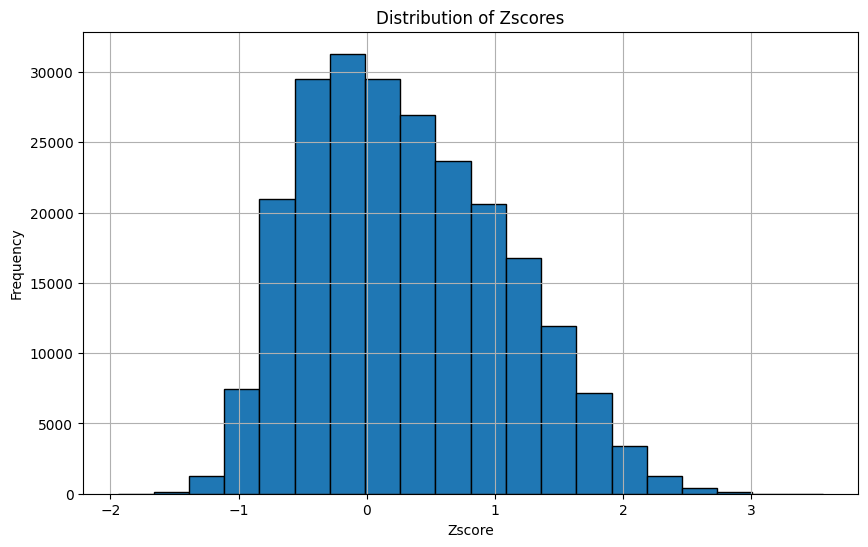

In [72]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col

# Assuming 'df' is your existing DataFrame
# Replace 'Zscore' with the actual column name in your DataFrame

# Filter out non-numeric values ('-') from the Zscore column
filtered_df = df.filter(col('Zscore').cast('float').isNotNull())

# Convert PySpark DataFrame to Pandas DataFrame
pandas_df = filtered_df.select('Zscore').toPandas()

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(pandas_df['Zscore'].astype(float), bins=20, edgecolor='black')
plt.title('Distribution of Zscores')
plt.xlabel('Zscore')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()
